# Signals & Systems
## Homework 1
### Igor Alentev

In [364]:
# Just some signals to play with
from thinkdsp import read_wave, decorate
from thinkdsp import  SinSignal, SawtoothSignal, TriangleSignal, SquareSignal, normalize, unbias
from thinkdsp import GlottalSignal, Chirp, CubicSignal, ParabolicSignal
import sys
sys.setrecursionlimit(100000)

## Recording Analysis
I have decided to omit "ь", since it is pretty difficult to pronounce and synthesise. Moreover, in English language usually it is omitted completely in my name. As a result, I will use "Igor" as a word to synthesize.

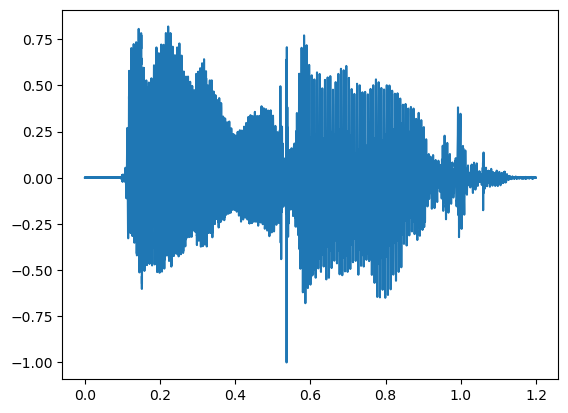

In [365]:
wave = read_wave('assets/igor_rec.wav')
wave.plot()
wave.make_audio()

I have pronounced long vowels to simplify the synthesis. Moreover, 'r' is pretty simple, the hardest part is to pronounce 'g'.

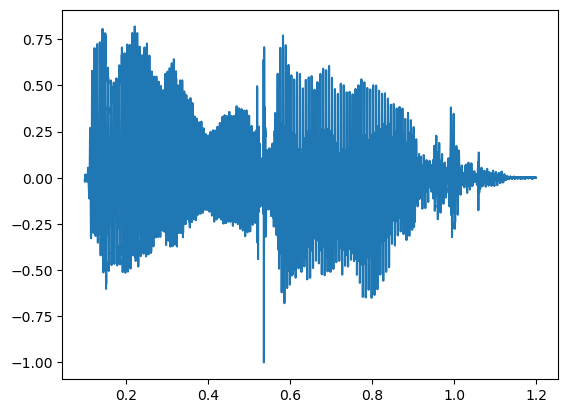

In [366]:
seg_cut = wave.segment(start=0.1, duration=1.1)
seg_cut.plot()
seg_cut.make_audio()

Here goes letter by letter cuts of my recording for further synthesis.

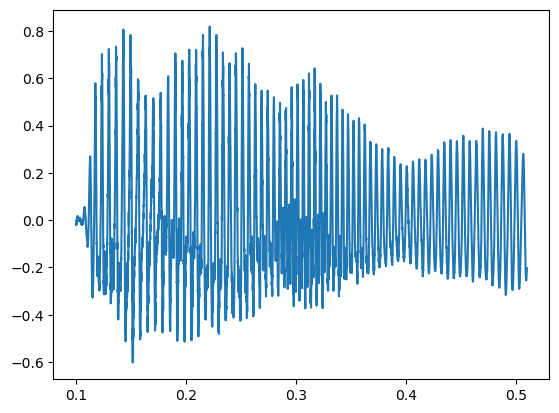

In [367]:
let_i = seg_cut.segment(start=0.1, duration=0.41)
let_i.plot()
let_i.make_audio()

'g' is very difficult letter. Let's hope it will be enough for synthesis.

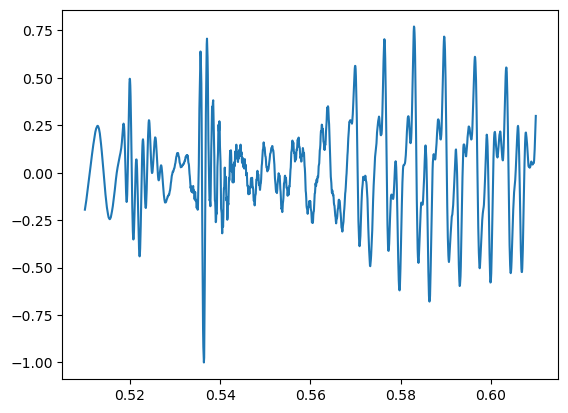

In [368]:
let_g = seg_cut.segment(start=0.51, duration=0.1)
let_g.plot()
let_g.make_audio()

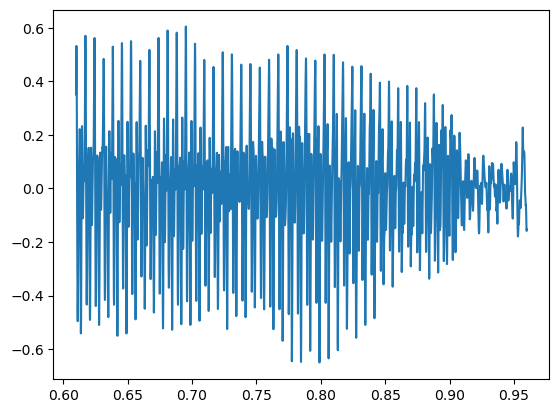

In [369]:
let_o = seg_cut.segment(start=0.61, duration=0.35)
let_o.plot()
let_o.make_audio()

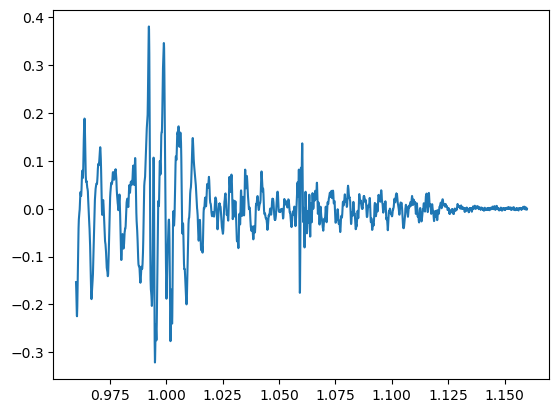

In [370]:
let_r = seg_cut.segment(start=0.96, duration=0.2)
let_r.plot()
let_r.make_audio()

## For synthesis we need to analyse spectrum 

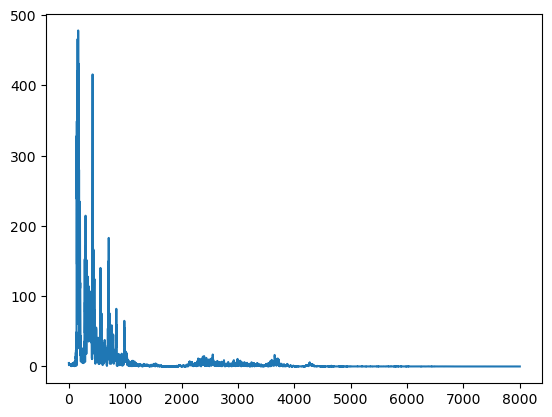

In [371]:
seg_cut.make_spectrum().plot()

In [372]:
"""
This function takes a wave, start and duration
and return a synthesized wave. I have tried to 
make it general solution for all the waves I have.
Basically it filters non-zero amplitudes
with low-pass filter (basically nothing happens
and I will explain why later) and then take
highest peaks and generate a signal with them.
"""

def magic_synthesis(wave, start, duration):
    spectrum = wave.make_spectrum()
    peaks = spectrum.peaks()
    max_freq = 0
    for peak in peaks:
        if peak[0] > 0:
            max_freq = peak[1]
    spectrum.low_pass(max_freq + 1)
    peaks = spectrum.peaks()
    res = SinSignal(freq=0, amp=0, offset=0)
    for peak in peaks[:250]:
        res += SinSignal(freq=peak[1], amp=peak[0], offset=0)
        if peak[1] < 500:
            res += SquareSignal(freq=peak[1], amp=peak[0] / 25, offset=0)
        if peak[1] > 3000:
            res += SawtoothSignal(freq=peak[1], amp=peak[0], offset=0)
    for peak in peaks[250:]:
        res += SinSignal(freq=-peak[1], amp=peak[0], offset=0)
        res += SquareSignal(freq=-peak[1], amp=peak[0], offset=0)
    res = res.make_wave(duration=duration, start=start, framerate=wave.framerate)
    res.unbias()
    res.normalize()
    res.apodize()
    return res

## Explanation of the synthesis
1. **Why we do not apply low-pass filter?**
Since I wanted a general solution, I had to unify the filter as well.
However, the problem arises, even a small filtering of the letter 'r'
completely destroys the sound. As a result, the only way is to
apply a low-pass to zero amplitudes.
2. **Why we do not apply high-pass filter?**
According to the spectrum analysis, there was no point in doing so.
3. **Which signals are used?**
   1. `SinSignal` is generally used to generate the signal on basically all frequencies.
   2. `SquareSignal` is used with very low amplitude to make a low sounding vowels lounder and noisier. With low amplitude sound is not so harsh.
   3. `SawtoothSignal` is used for very high frequencies with intention to make the sound more "sharp" and "prolonging" rather than instanteneous hit.
   4. It is either me or the sound really becomes clearer if we subtract `SquareSignal` from `SinSignal` for the peaks after first 250.
4. Finally I have cut the letter 'i' in half, since it was too long and sounded unnatural

Writing assets/new_let_i.wav
Writing assets/new_let_g.wav
Writing assets/new_let_o.wav
Writing assets/new_let_r.wav
Writing assets/new_word.wav


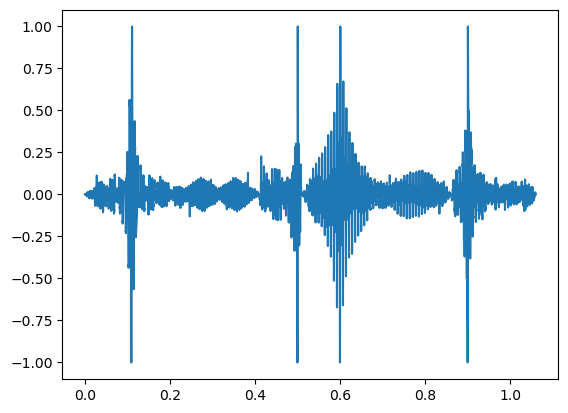

In [373]:
new_let_i = magic_synthesis(let_i, 0.3, 0.41)
new_let_g = magic_synthesis(let_g, 0.51, 0.1)
new_let_o = magic_synthesis(let_o, 0.61, 0.35)
new_let_r = magic_synthesis(let_r, 0.96, 0.2)

new_word = new_let_i | new_let_g | new_let_o | new_let_r
new_word.make_audio()
new_let_i.write('assets/new_let_i.wav')
new_let_g.write('assets/new_let_g.wav')
new_let_o.write('assets/new_let_o.wav')
new_let_r.write('assets/new_let_r.wav')
new_word.write('assets/new_word.wav')
new_word.plot()